In [329]:
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,14)
import seaborn as sns
import pandas as pd
import numpy as np

In [330]:
DATASET_COLUMNS= ["tweet", "ID", "CreatedAt", "username", "isRetweet", "FavoriteCount" ,"isPossiblySensitive" ,"lang" ,"RetweetCount" ,"UserMention", "Jakeashacks", "Hashtag",	"MediaEntities"]
df = pd.read_csv('tweets1.csv', encoding="UTF-8", sep="|", names=DATASET_COLUMNS)
df.head()

,tweet,ID,CreatedAt,username,isRetweet,FavoriteCount,isPossiblySensitive,lang,RetweetCount,UserMention,Jakeashacks,Hashtag,MediaEntities
0,tweet : 1,ID : 1180558125004288001,CreatedAt : Sat Oct 05 21:59:25 EET 2019,username : @muhammadazky_,isRetweet : true,FavoriteCount : 0,isPossiblySensitive : false,Lang : en,RetweetCount : 30,"UserMention : Jakeashacks,",Hashtag :,MediaEntities :,rt @jakeashacks: 1. first language: c++\t2. h...
1,tweet : 2,ID : 1180558123343331328,CreatedAt : Sat Oct 05 21:59:24 EET 2019,username : @javascript_bug,isRetweet : true,FavoriteCount : 0,isPossiblySensitive : false,Lang : en,RetweetCount : 4,"UserMention : akshaymarch7,",Hashtag :,MediaEntities :,rt @akshaymarch7: 1. first language: javascri...
2,tweet : 3,ID : 1180558068767178753,CreatedAt : Sat Oct 05 21:59:11 EET 2019,username : @zcoldplayer,isRetweet : true,FavoriteCount : 0,isPossiblySensitive : false,Lang : en,RetweetCount : 1,"UserMention : kai_nyasha,",Hashtag :,MediaEntities :,rt @kai_nyasha: fine.\t\t1. first language: l...
3,tweet : 4,ID : 1180557978082127873,CreatedAt : Sat Oct 05 21:58:50 EET 2019,username : @Spolfaret,isRetweet : false,FavoriteCount : 0,isPossiblySensitive : false,Lang : en,RetweetCount : 0,UserMention :,Hashtag :,MediaEntities :,1. first language: winlogo\t2. had difficulti...
4,tweet : 5,ID : 1180557968774967296,CreatedAt : Sat Oct 05 21:58:48 EET 2019,username : @nbuesing,isRetweet : false,FavoriteCount : 0,isPossiblySensitive : false,Lang : en,RetweetCount : 0,UserMention :,Hashtag :,MediaEntities :,1. first language: commodore 64 basic\t2. had...


In [331]:
data = pd.DataFrame(df.MediaEntities)
data

,MediaEntities
0,rt @jakeashacks: 1. first language: c++\t2. h...
1,rt @akshaymarch7: 1. first language: javascri...
2,rt @kai_nyasha: fine.\t\t1. first language: l...
3,1. first language: winlogo\t2. had difficulti...
4,1. first language: commodore 64 basic\t2. had...
...,...
13862,1. first language: turbopascal\t2. had diffic...
13863,rt @nicknisi: 1. first language: java\t2. had...
13864,1. first language: python / c++\t2. had diffi...
13865,1. first language: java\t2. had difficulties:...


In [332]:
data['MediaEntities'][0]

' rt @jakeashacks: 1. first language: c++\t2. had difficulties: objective c\t3. most used: c\t4. totally hate: c++\t5. most loved: c\t6. for begin…'

In [333]:
data['MediaEntities'][0].split('\t')

[' rt @jakeashacks: 1. first language: c++',
 '2. had difficulties: objective c',
 '3. most used: c',
 '4. totally hate: c++',
 '5. most loved: c',
 '6. for begin…']

In [334]:
data['MediaEntities'].values[0]

' rt @jakeashacks: 1. first language: c++\t2. had difficulties: objective c\t3. most used: c\t4. totally hate: c++\t5. most loved: c\t6. for begin…'

In [335]:
from collections import defaultdict
import re

lst = defaultdict(list)
counter = defaultdict(int)
dictt = defaultdict(list)

choices = ['1. first language', '2. had difficulties', '3. most used', '4. totally hate', '5. most loved', 
           '6. for beginners']

lang = ["c#", "c\++", "pascal", 'js', "javascript", "java script", "matlab", "python", "java", "c ", " c",
        "typescript", "gml", "assembly language", "html", "basic", "basýc", "sql",
        "logo", "php", "go", "swift","ruby", "assembly", " .net", "css",
        "visual basic", "fortran", "perl", "lisp", "qbasic","turbo pascal","c64 basic","c64 basýc",
        "sinclair basýc","haskell", "prolog", "haskell", "cobol", "vb", 
        "vba", "objective-c"]

languages = '|'.join(lang)


for i in data['MediaEntities'].values:
    for j in choices:
        for k in i.split('\t'):
            if j in k:
                lst[j].append(k.split(':')[-1].strip())

for i in lst:
    counter = defaultdict(int)
    for j in lst[i]:
        res = re.findall(languages, j)
        if res != []:
            for k in res:
                counter[k] += 1
    dictt[i].append(counter)

In [336]:
len(lang)

42

In [337]:
print(dictt)

defaultdict(<class 'list'>, {'1. first language': [defaultdict(<class 'int'>, {'c++': 955, 'javascript': 619, 'logo': 328, 'basic': 1982, 'basýc': 1681, 'perl': 102, 'pascal': 940, 'matlab': 84, 'cobol': 38, ' c': 606, 'python': 535, 'java': 1183, 'visual basic': 418, 'vb': 301, 'haskell': 19, 'sql': 24, 'qbasic': 367, 'go': 66, 'php': 501, 'objective-c': 39, 'turbo pascal': 217, 'html': 344, 'ruby': 78, 'c#': 218, 'c64 basic': 56, 'assembly': 127, 'c ': 250, 'c64 basýc': 60, 'gml': 94, 'lisp': 15, ' .net': 21, 'fortran': 181, 'js': 40, 'sinclair basýc': 42, 'java script': 3, 'css': 30, 'prolog': 8, 'swift': 8, 'c+': 2, 'assembly language': 4, 'typescript': 1})], '2. had difficulties': [defaultdict(<class 'int'>, {' c': 687, 'javascript': 1128, 'c++': 2340, 'prolog': 299, 'haskell': 637, 'matlab': 61, 'lisp': 239, 'python': 247, 'java': 1620, 'c ': 145, 'go': 157, 'css': 66, 'php': 325, 'assembly': 581, 'perl': 256, 'c#': 230, 'cobol': 72, 'objective-c': 132, 'ruby': 200, 'swift': 53, 

In [338]:
for i in dictt:
    print(i)

1. first language
2. had difficulties
3. most used
4. totally hate
5. most loved
6. for beginners


In [339]:
df1 = pd.DataFrame(dictt['1. first language']).T

In [340]:
df1.rename(columns={0:'first_language'}, inplace=True)

In [341]:
df2 = pd.DataFrame(dictt['2. had difficulties']).T

In [342]:
df2.rename(columns={0:'had_difficulties'}, inplace=True)

In [343]:
df3 = pd.DataFrame(dictt['3. most used']).T

In [344]:
df3.rename(columns={0:'most_used'}, inplace=True)

In [345]:
df4 = pd.DataFrame(dictt['4. totally hate']).T

In [346]:
df4.rename(columns={0:'totally_hate'}, inplace=True)

In [347]:
df5 = pd.DataFrame(dictt['5. most loved']).T

In [348]:
df5.rename(columns={0:'most_loved'}, inplace=True)

In [349]:
df6 = pd.DataFrame(dictt['6. for beginners']).T

In [350]:
df6.rename(columns={0:'for_beginners'}, inplace=True)

In [351]:
m1 = pd.merge(df1, df2, left_index=True, right_index=True)

In [352]:
m2 = pd.merge(m1, df3, left_index=True, right_index=True)

In [353]:
m3 = pd.merge(m2, df4, left_index=True, right_index=True)

In [354]:
m4 = pd.merge(m3, df5, left_index=True, right_index=True)

In [355]:
m5 = pd.merge(m4, df6, left_index=True, right_index=True)

In [356]:
m5.sort_index()

,first_language,had_difficulties,most_used,totally_hate,most_loved,for_beginners
.net,21,4,10,26,15,3
c,606,687,1060,597,739,226
assembly,127,581,73,144,101,22
assembly language,4,21,1,20,5,1
basic,1982,16,12,43,15,54
basýc,1681,18,10,14,14,30
c,250,145,126,72,101,52
c#,218,230,1254,247,881,157
c++,955,2340,1116,823,637,80
cobol,38,72,12,124,7,3


In [357]:
m5 = m5.reset_index(level=0)

In [358]:
m5.rename({"index":"Languages"}, axis=1, inplace=True)
m5

,Languages,first_language,had_difficulties,most_used,totally_hate,most_loved,for_beginners
0,c++,955,2340,1116,823,637,80
1,javascript,619,1128,3275,1722,1123,565
2,logo,328,6,6,1,7,39
3,basic,1982,16,12,43,15,54
4,basýc,1681,18,10,14,14,30
5,perl,102,256,261,355,154,13
6,pascal,940,70,49,59,76,92
7,matlab,84,61,57,135,33,7
8,cobol,38,72,12,124,7,3
9,c,606,687,1060,597,739,226


In [359]:
javascript = m5.iloc[1] + m5.iloc[30]
javascript

Languages           javascriptjs
first_language               659
had_difficulties            1257
most_used                   3661
totally_hate                1966
most_loved                  1317
for_beginners                709
dtype: object

In [360]:
basic = m5.iloc[3] + m5.iloc[4]
basic

Languages           basicbasýc
first_language            3663
had_difficulties            34
most_used                   22
totally_hate                57
most_loved                  29
for_beginners               84
dtype: object

In [361]:
assembly = m5.iloc[24] + m5.iloc[34]
assembly

Languages           assemblyassembly language
first_language                            131
had_difficulties                          602
most_used                                  74
totally_hate                              164
most_loved                                106
for_beginners                              23
dtype: object

In [362]:
c = m5.iloc[9] + m5.iloc[25]
c

Languages            cc 
first_language       856
had_difficulties     832
most_used           1186
totally_hate         669
most_loved           840
for_beginners        278
dtype: object

In [363]:
visual_basic = m5.iloc[12] + m5.iloc[13]
visual_basic

Languages           visual basicvb
first_language                 719
had_difficulties                68
most_used                       86
totally_hate                   443
most_loved                      61
for_beginners                   98
dtype: object

In [364]:
m5 = pd.concat([m5, pd.DataFrame(javascript).T, pd.DataFrame(basic).T, pd.DataFrame(assembly).T,
                pd.DataFrame(c).T,  pd.DataFrame(visual_basic).T], axis=0).reset_index(drop=True)
m5

,Languages,first_language,had_difficulties,most_used,totally_hate,most_loved,for_beginners
0,c++,955,2340,1116,823,637,80
1,javascript,619,1128,3275,1722,1123,565
2,logo,328,6,6,1,7,39
3,basic,1982,16,12,43,15,54
4,basýc,1681,18,10,14,14,30
5,perl,102,256,261,355,154,13
6,pascal,940,70,49,59,76,92
7,matlab,84,61,57,135,33,7
8,cobol,38,72,12,124,7,3
9,c,606,687,1060,597,739,226


In [365]:
m5.drop(index=[1, 30, 3, 4, 24, 34, 12, 13, 9, 25], inplace=True)
m5.reset_index(drop=True)

,Languages,first_language,had_difficulties,most_used,totally_hate,most_loved,for_beginners
0,c++,955,2340,1116,823,637,80
1,logo,328,6,6,1,7,39
2,perl,102,256,261,355,154,13
3,pascal,940,70,49,59,76,92
4,matlab,84,61,57,135,33,7
5,cobol,38,72,12,124,7,3
6,python,535,247,3016,434,2431,2039
7,java,1183,1620,1889,2730,718,186
8,haskell,19,637,83,94,300,31
9,sql,24,79,277,61,116,18


In [366]:
m5

,Languages,first_language,had_difficulties,most_used,totally_hate,most_loved,for_beginners
0,c++,955,2340,1116,823,637,80
2,logo,328,6,6,1,7,39
5,perl,102,256,261,355,154,13
6,pascal,940,70,49,59,76,92
7,matlab,84,61,57,135,33,7
8,cobol,38,72,12,124,7,3
10,python,535,247,3016,434,2431,2039
11,java,1183,1620,1889,2730,718,186
14,haskell,19,637,83,94,300,31
15,sql,24,79,277,61,116,18


In [367]:
m5.loc[36, "Languages"] = "javascript"
m5.loc[37, "Languages"] = "basic"
m5.loc[38, "Languages"] = "assembly"
m5.loc[39, "Languages"] = "c"
m5.loc[40, "Languages"] = "visual basic"

In [368]:
m5.reset_index(drop=True, inplace=True)

In [369]:
m5

,Languages,first_language,had_difficulties,most_used,totally_hate,most_loved,for_beginners
0,c++,955,2340,1116,823,637,80
1,logo,328,6,6,1,7,39
2,perl,102,256,261,355,154,13
3,pascal,940,70,49,59,76,92
4,matlab,84,61,57,135,33,7
5,cobol,38,72,12,124,7,3
6,python,535,247,3016,434,2431,2039
7,java,1183,1620,1889,2730,718,186
8,haskell,19,637,83,94,300,31
9,sql,24,79,277,61,116,18


In [370]:
m5.Languages = m5.Languages.str.title()

In [371]:
m5.sum()

Languages           C++LogoPerlPascalMatlabCobolPythonJavaHaskellS...
first_language                                                  12424
had_difficulties                                                10118
most_used                                                       16288
totally_hate                                                    10984
most_loved                                                      10494
for_beginners                                                    4661
dtype: object

In [372]:
m5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Languages         31 non-null     object
 1   first_language    31 non-null     object
 2   had_difficulties  31 non-null     object
 3   most_used         31 non-null     object
 4   totally_hate      31 non-null     object
 5   most_loved        31 non-null     object
 6   for_beginners     31 non-null     object
dtypes: object(7)
memory usage: 1.8+ KB


# Visualizing Stage

## First Language

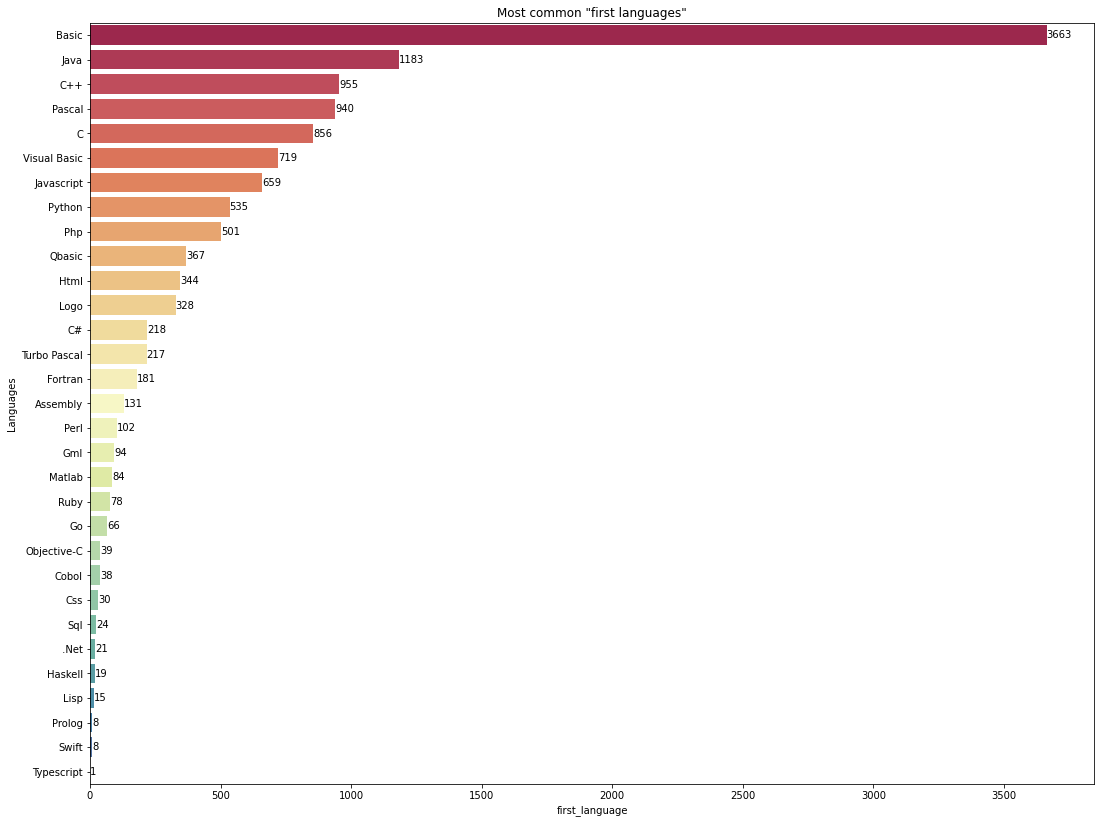

In [373]:
import seaborn as sns
sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
plt.title('Most common "first languages"')
order = m5.groupby(["Languages"])["first_language"].mean().sort_values(ascending=False).index
ax = sns.barplot(y="Languages", x="first_language", data=m5, order=order, palette="Spectral") #, order=m5["first_language"])
for p in ax.containers:
    ax.bar_label(p)

## Had Diffuculties

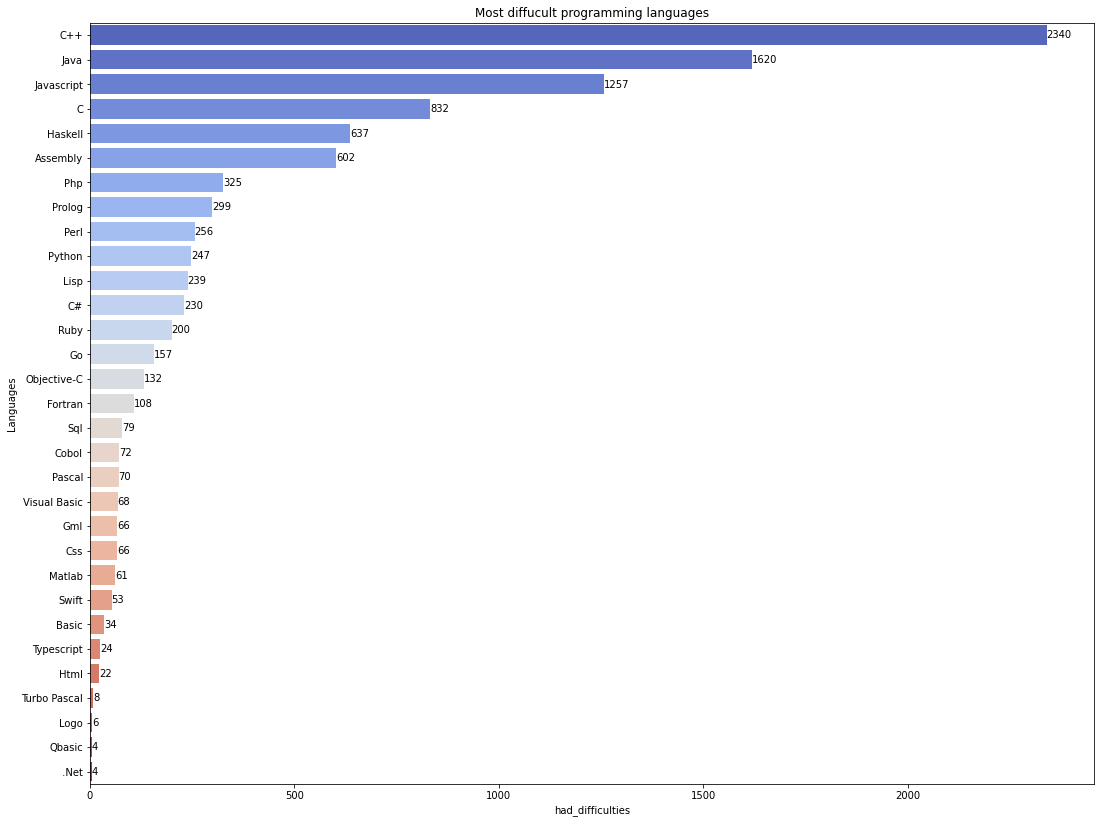

In [374]:
sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
plt.title('Most diffucult programming languages') 
order = m5.groupby(["Languages"])["had_difficulties"].mean().sort_values(ascending=False).index
ax = sns.barplot(y="Languages", x="had_difficulties", order=order, data=m5, palette="coolwarm")
for p in ax.containers:
    ax.bar_label(p)

## Most Used

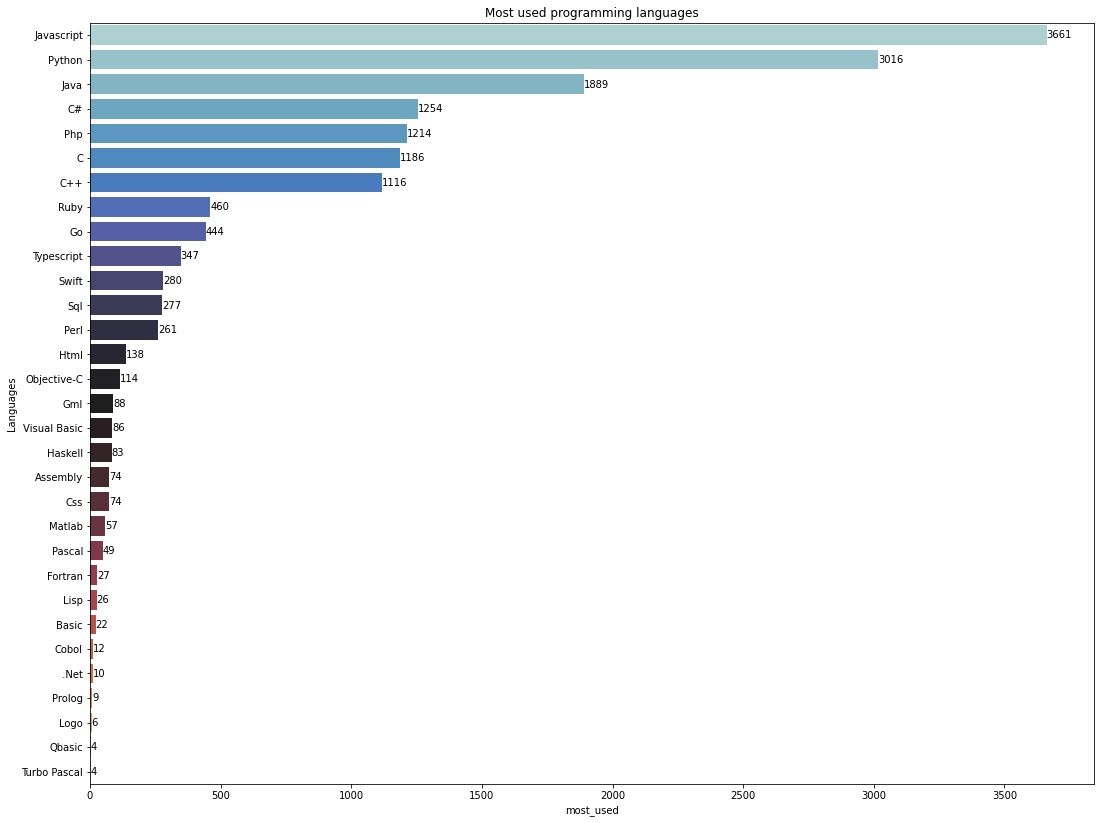

In [375]:
sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
plt.title('Most used programming languages') 
order = m5.groupby(["Languages"])["most_used"].mean().sort_values(ascending=False).index
ax = sns.barplot(y="Languages", x="most_used", order=order, data=m5, palette="icefire")
for p in ax.containers:
    ax.bar_label(p)

## Totaly Hate

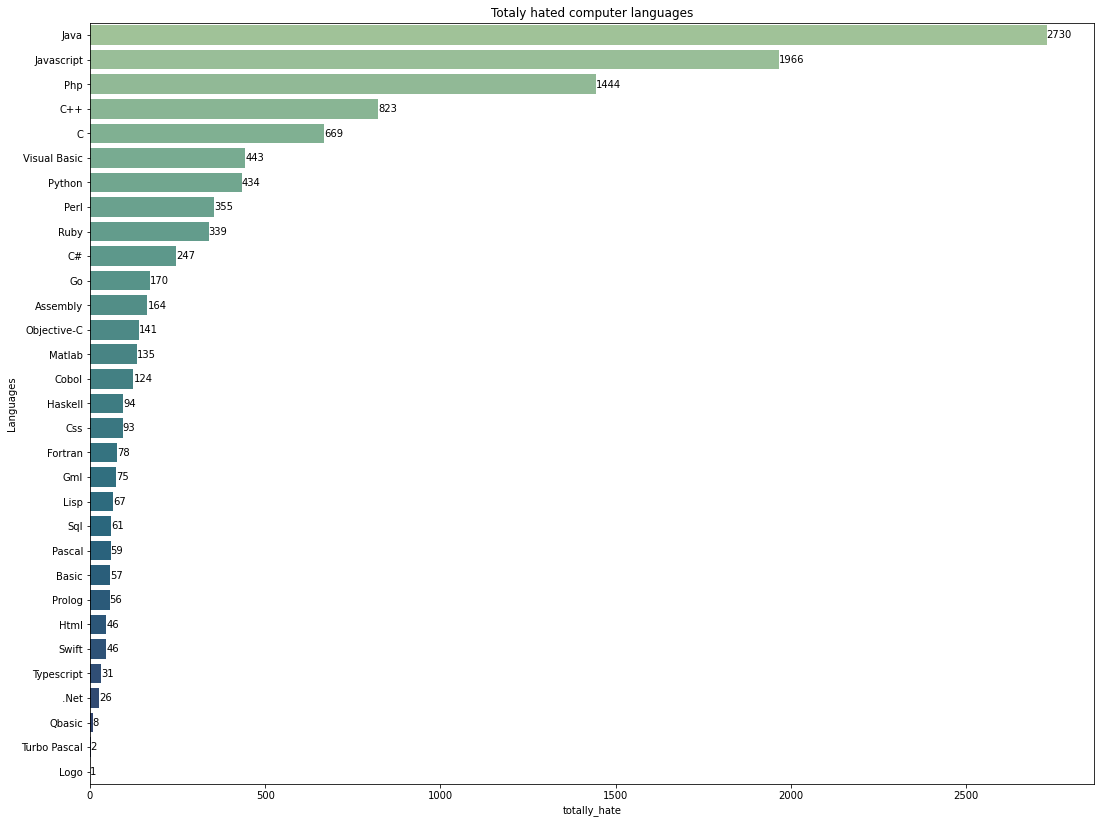

In [376]:
sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
plt.title('Totaly hated computer languages') 
order = m5.groupby(["Languages"])["totally_hate"].mean().sort_values(ascending=False).index
ax = sns.barplot(y="Languages", x="totally_hate", order=order,data=m5, palette="crest")
for p in ax.containers:
    ax.bar_label(p)

## Most Loved

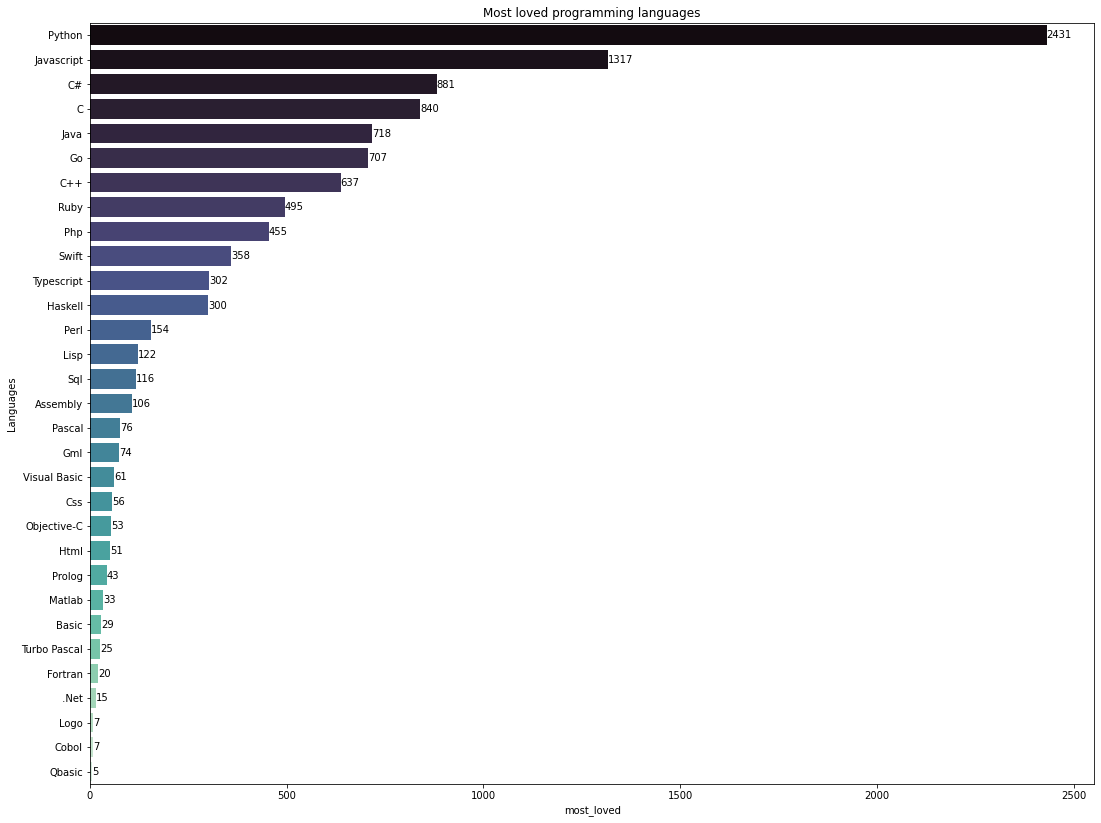

In [377]:
sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
plt.title('Most loved programming languages') 
order = m5.groupby(["Languages"])["most_loved"].mean().sort_values(ascending=False).index
ax = sns.barplot(y="Languages", x="most_loved", order=order, data=m5, palette="mako")
for p in ax.containers:
    ax.bar_label(p)

## For Beginners

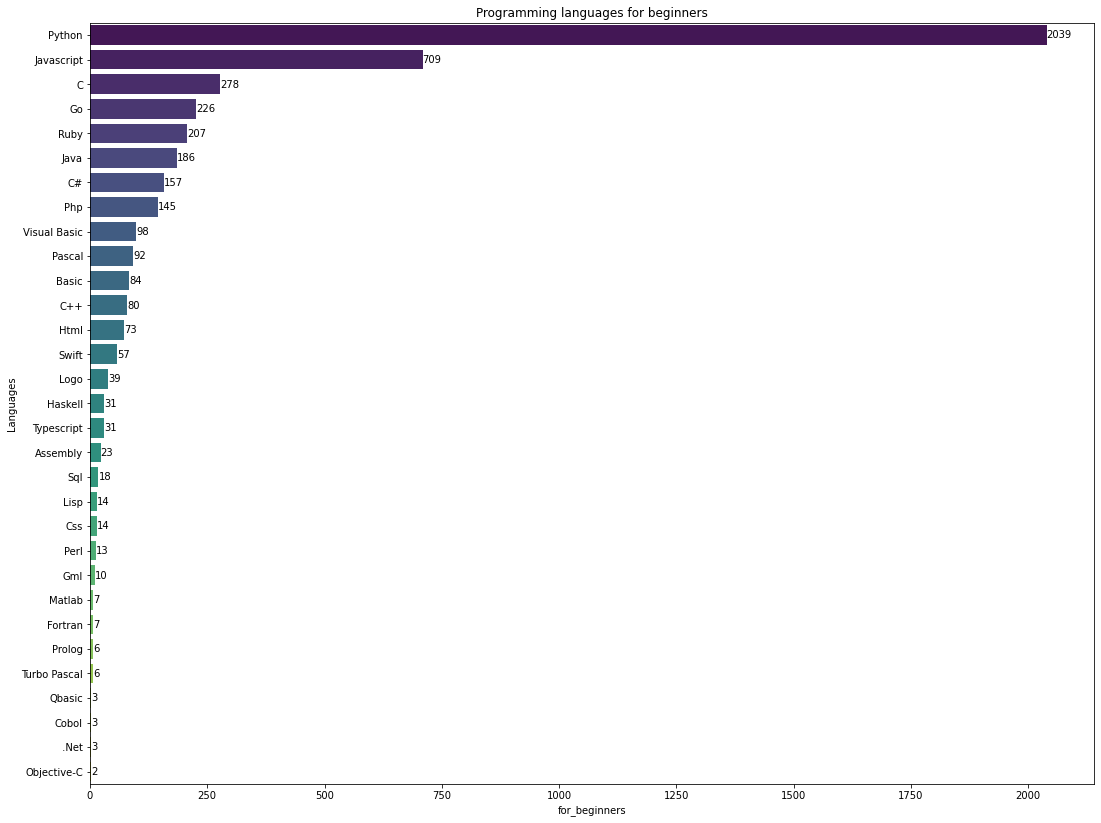

In [378]:
sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
plt.title('Programming languages for beginners') 
order = m5.groupby(["Languages"])["for_beginners"].mean().sort_values(ascending=False).index
ax = sns.barplot(y="Languages", x="for_beginners", order=order,data=m5, palette="viridis")
for p in ax.containers:
    ax.bar_label(p)

## _The End_